In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2023/04/11
Revised on 2024/06/24

@author: mjofre - Marc Jofre
e-mail: marc.jofre@upc.edu
Technical University of Catalonia - Universitat Politècnica de Catalunya (UPC)
Network Engineering Department
"""
###########################################################################
# Seminar on Quantum Technologies for Communications and Computing: Networking and Systems
# Class
# Session 5 - Quantum Technologies ecosystem
from IPython.display import display_html
display_html("<script>Jupyter.notebook.kernel.restart()</script>")
import os, sys, time
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab import files # This line can be commented when running in local computer
import matplotlib.style
import matplotlib as mpl
#print(plt.style.available)
mpl.style.use('default')

try:
  import qiskit
  import qiskit_aer
except:
  print("installing qiskit...")
  !pip install qiskit -U --quiet
  !pip install qiskit_aer -U --quiet
  print("installed qiskit.")
  import qiskit
  import qiskit_aer


installing qiskit...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.2 MB/s eta 0:00:00
installed qiskit.


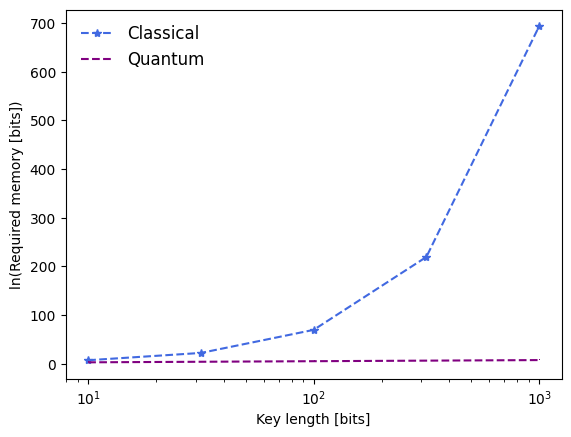

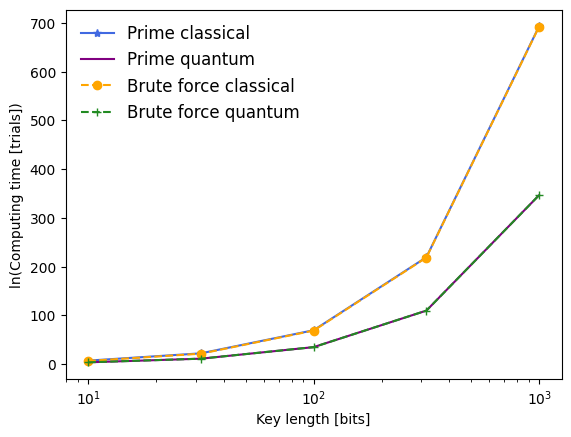

In [2]:
###############################################################################
# Comparison of required memory and computing time to break cryptography algorithms

NumberKLscan=5
KeyLengthScan=np.logspace(1,3,NumberKLscan)# in bits
NLength=2**KeyLengthScan

# Required memory
RequiredMemoryClassical=NLength
RequiredMemoryQuantum=2*np.log(NLength)

# Required computation time
RequiredCompTimeClassicalPrimeFactor=NLength
RequiredCompTimeQuantumPrimeFactor=12*np.log(NLength)
RequiredCompTimeClassicalBruteForce=NLength/2
RequiredCompTimeQuantumPrimeFactor=np.sqrt(NLength)

plt.figure()
line1,=plt.plot(KeyLengthScan,np.log(RequiredMemoryClassical),'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(KeyLengthScan,np.log(RequiredMemoryQuantum),'purple',linestyle='dashed',marker=',')
plt.legend((line1, line2), ('Classical','Quantum'), loc="best",shadow = False, fancybox = False, frameon = False, fontsize='large')
plt.xscale('log')
plt.xlabel('Key length [bits]',color='k')
plt.ylabel('ln(Required memory [bits])',color='k')
plt.show()

plt.figure()
line1,=plt.plot(KeyLengthScan,np.log(RequiredCompTimeClassicalPrimeFactor),'royalblue',linestyle='solid',marker='*')
line2,=plt.plot(KeyLengthScan,np.log(RequiredCompTimeQuantumPrimeFactor),'purple',linestyle='solid',marker=',')
line3,=plt.plot(KeyLengthScan,np.log(RequiredCompTimeClassicalBruteForce),'orange',linestyle='dashed',marker='o')
line4,=plt.plot(KeyLengthScan,np.log(RequiredCompTimeQuantumPrimeFactor),'forestgreen',linestyle='dashed',marker='+')
plt.legend((line1, line2, line3, line4), ('Prime classical','Prime quantum','Brute force classical','Brute force quantum'), loc="best",shadow = False, fancybox = False, frameon = False, fontsize='large')
plt.xscale('log')
plt.xlabel('Key length [bits]',color='k')
plt.ylabel('ln(Computing time [trials])',color='k')
plt.show()


# Quantum coin flip to distribute the topics

The topics to distribute:
 - 1: SME/start-up/spin-off companies working in quantum, large companies working in quantum.
 - 2: Institutions researching and innovating in quantum, standardization and regulation bodies working in quantum.
 - 3: Deployed quantum infrastructure, and market perspective of quantum technologies.
 - 4: Application domains and use cases of quantum technologies.

In [3]:
###############################################################################
# Quantum coin flip - to distribute randomly the topics
from qiskit_aer import AerSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

NnumberToDistribute=4 # Number of topics to distribute
OrderedArrayTopics=np.arange(1,NnumberToDistribute+1,1)
Nshots=int(np.ceil(np.log2(NnumberToDistribute)))

q = QuantumRegister(1)
c = ClassicalRegister(1)
circ = QuantumCircuit(q, c)

circ.h(q)
circ.measure(q, c)

# Construct an ideal simulator
aersim = AerSimulator()

job = aersim.run(circ, shots=Nshots, memory=True)

data = job.result().get_memory()
#print(data)
binaryOutput = int(''.join(data), 2)

print(f'Quantum number result {binaryOutput}')

RandomOrderedArray=np.roll(OrderedArrayTopics,len(OrderedArrayTopics)-binaryOutput)

print(f'The order of the topics are {RandomOrderedArray}')


Quantum number result 2
The order of the topics are [3 4 1 2]


# Wrap-up of Probability errors and Fidelity

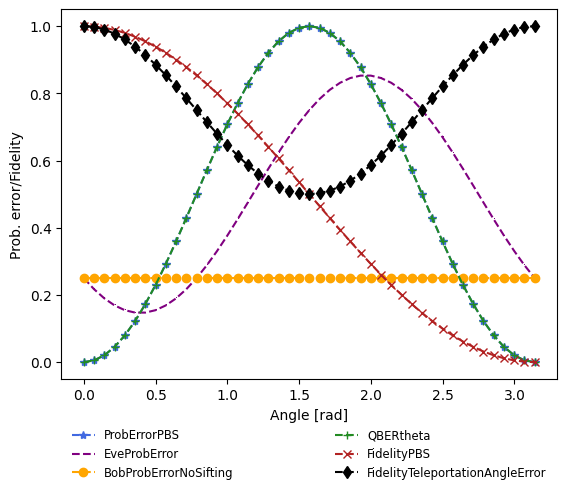

In [4]:
##############################################################################
# Relation of Probability errors, QBER, Fidelities with the the rotation of the measurement basis \theta
NcalcAngle=45
MaxAngle=np.pi
AnglesScan=np.linspace(0,MaxAngle,NcalcAngle)

ProbErrorPBS=1.0-np.cos(AnglesScan)**2
EveProbError=0.25*((1.0-np.cos(2.0*AnglesScan))+(1.0-np.sin(2.0*AnglesScan))) # Error probability when Eve is randomly changing basis (it is minimized to 14.64% when theta=np.pi/8 - Breidbart basis)
BobProbErrorNoSifting=0.25*((1.0-np.cos(2.0*AnglesScan)**2)+(1.0-np.sin(2.0*AnglesScan)**2)) # Error probability when Bob is randomly changes basis (before key sifting)
QBERtheta=1.0-np.cos(AnglesScan)**2 # Error probability equivalent to Bob when doing sifting
FidelityPBS=1.0-np.sin(AnglesScan/2.0)**2# Angle is half, because at np.pi/2.0 its like at half place between the two states
FidelityTeleportationAngleError=1.0-ProbErrorPBS/2.0
# Fidelity towards a Bell state if usually as F=0.5*(1+cos(\theta)); depending on the Bell state of interest \theta has to be adjusted or even the cos can be replaced by a sin
# Fidelity cascaded devices F=Fi**N
# Fidelity in terms of coincidences F=RatioRc/(1.0+RatioRc), where RatioRc is the ratio of coincidences between RcParallel/RcOrthogonal (Rc coincidence rate)

plt.figure()
line1,=plt.plot(AnglesScan,ProbErrorPBS,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(AnglesScan,EveProbError,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(AnglesScan,BobProbErrorNoSifting,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(AnglesScan,QBERtheta,'forestgreen',linestyle='dashed',marker='+')
line5,=plt.plot(AnglesScan,FidelityPBS,'firebrick',linestyle='dashed',marker='x')
line6,=plt.plot(AnglesScan,FidelityTeleportationAngleError,'black',linestyle='dashed',marker='d')
plt.legend((line1, line2, line3, line4, line5, line6), ('ProbErrorPBS','EveProbError','BobProbErrorNoSifting','QBERtheta','FidelityPBS','FidelityTeleportationAngleError'),bbox_to_anchor=(0, -0.3, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.xlabel('Angle [rad]',color='k')
plt.ylabel('Prob. error/Fidelity',color='k')
plt.show()

####################################################
# Relevant transmittivity/loss related equations:
# Rr=eta Rs # where eta is the transmissivity as eta \leq 1 and proportional to np.exp(-att Distance), where att is the attenuation att\geq 0.
# dBatt=dBLoss/Km*L(Km)
# dBatt=-10 log10(eta)
# ProbabilityPhotonLoss=1-eta=1-np.exp(-Distance/L0), where dBLoss/Km * L0=-10 log10(1/e)

####################################################
# Relevant trigonometric relations
# cos(theta)**2+sin(theta)**2=1
# sin(theta)**2=0.5*(1-cos(2theta))
# cos(theta)**2=0.5*(1+cos(2theta))